# Important Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
from sklearn.preprocessing import LabelEncoder #converting traget variable, object into int 
from sklearn.preprocessing import MinMaxScaler #scaling we can also use RobustScaler and StandardScaler
from sklearn.model_selection import train_test_split #Splitting the dataset into train and test
from imblearn.over_sampling import SMOTE #Balancing the Target variable
from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score,confusion_matrix # for Data Performance
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
#from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # to SHow Decision Tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectKBest, chi2 # Feature Selection
from sklearn.model_selection import GridSearchCV # finding best method by iterating multiple condition
from sklearn.metrics import roc_curve, roc_auc_score # performance
import warnings # removing warning signs
warnings.filterwarnings('ignore')

In [2]:
# Import data to dataframe
df=pd.read_csv(r"C:\Users\aarza\Desktop\Dataset\imarticus\basant ml\income_evaluation.csv")

# 1. Data Exploration

### Column info 
* age: Age of the individual.
* workclass: The type of employer or working class, such as Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov,       State-gov, Without-pay, Never-worked.
* fnlwgt: A weight that represents the number of people that believes the entry represents.
* education: Highest level of education completed, such as Bachelors, Masters, Doctorate, etc.
* education-num: Numeric representation of education (e.g., 12 for high school diploma).
* marital-status: Marital status of the individual, such as Married-civ-spouse, Divorced, Never-married, etc.
* occupation: Occupation of the individual, such as Tech-support, Craft-repair, Exec-managerial, etc.
* relationship: Relationship status, such as Wife, Own-child, Husband, Not-in-family, etc.
* race: Race of the individual, such as White, Black, Asian-Pac-Islander, etc.
* sex: Gender of the individual, either Male or Female.
* capital-gain: Capital gains received by the individual.
* capital-loss: Capital losses experienced by the individual.
* hours-per-week: Number of hours worked per week.
* native-country: Country of origin or citizenship.
* income: Target variable indicating whether the individual earns more than 50k per year ('>50K') or at most 50k per               year ('<=50K').

In [3]:
pd.set_option('display.max_columns', 500)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Analyse columns

In [6]:
df.shape

(32561, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
for i in df.columns:
    print(f'{i}: {df[i].unique()}\n') #checking uniques of all columns

age: [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

 workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

 fnlwgt: [ 77516  83311 215646 ...  34066  84661 257302]

 education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

 education-num: [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

 occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-f

Now analyse all columns of the 'object' datatype

In [9]:
for i in df.columns:
    if df[i].dtype=='O':
        print(f'{i}: {df[i].unique()}\n')

 workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

 education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

 marital-status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

 occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

 relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

 race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

 sex: [' Male' ' Female']

 native-country: [' United-States' ' Cuba

changing column name because they have a space 

In [10]:
colm=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

In [11]:
df.columns=colm

NaN value are there in form for '?'

In [12]:
df.replace(' ?',np.nan,inplace=True)

In [13]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [14]:
df=df.dropna()

In [15]:
df['workclass']=df['workclass'].transform(lambda x: x.fillna(x.mode().iat[0]) if len(x.mode()) > 0 else np.nan)

In [16]:
df['occupation']=df['occupation'].transform(lambda x: x.fillna(x.mode().iat[0]) if len(x.mode()) > 0 else np.nan)

In [17]:
df['native-country']=df['native-country'].transform(lambda x: x.fillna(x.mode().iat[0]) if len(x.mode()) > 0 else np.nan)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Visualisation

In [19]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

<Axes: xlabel='income', ylabel='count'>

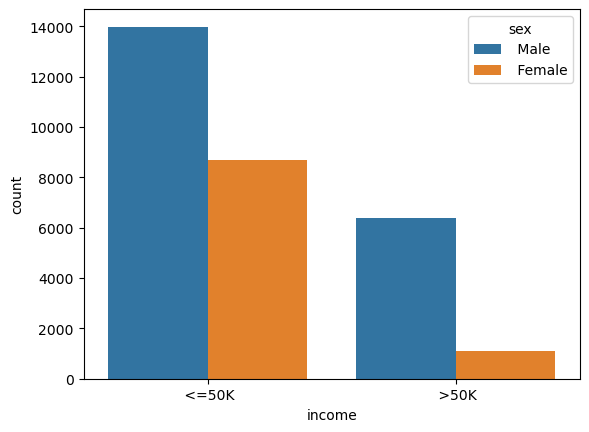

In [20]:
sns.countplot(x='income',hue='sex',data=df)

<Axes: xlabel='income', ylabel='count'>

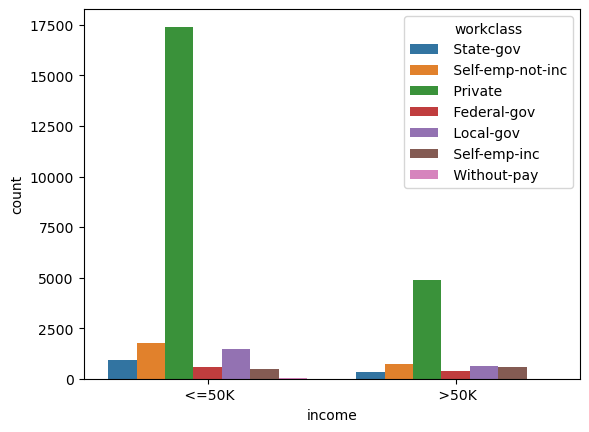

In [21]:
sns.countplot(x='income',hue='workclass',data=df)

<Axes: >

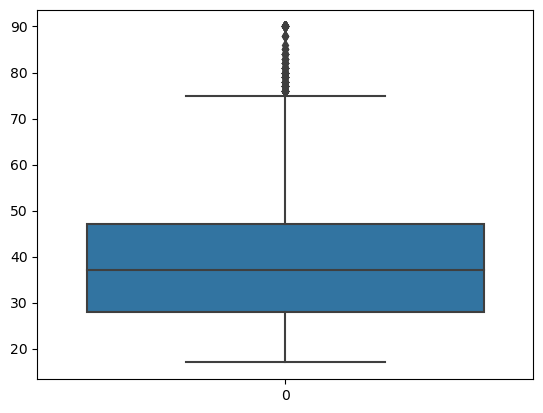

In [22]:
sns.boxplot(df['age'])

<Axes: xlabel='age', ylabel='Density'>

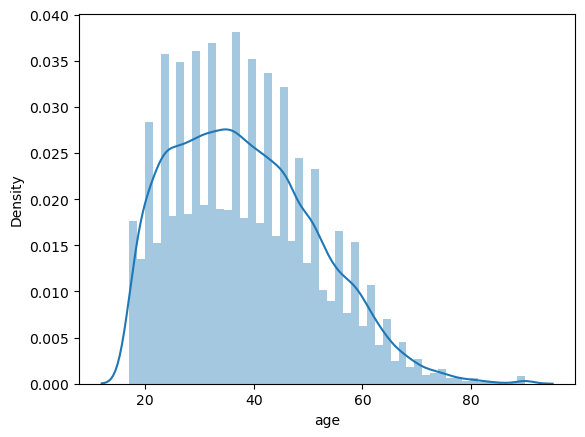

In [23]:
sns.distplot(df['age'])

<Axes: xlabel='income', ylabel='age'>

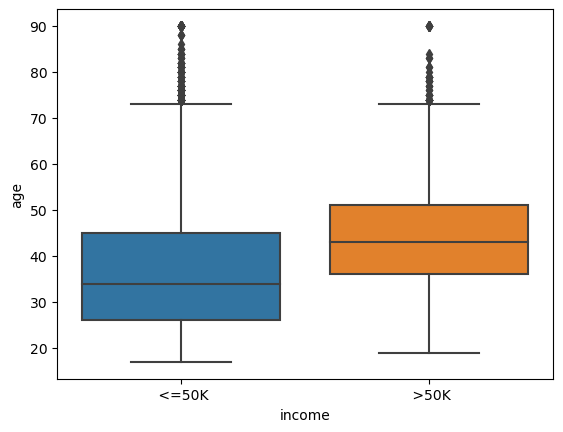

In [24]:
sns.boxplot(y=df['age'],x=df['income'] )

<Axes: xlabel='income', ylabel='age'>

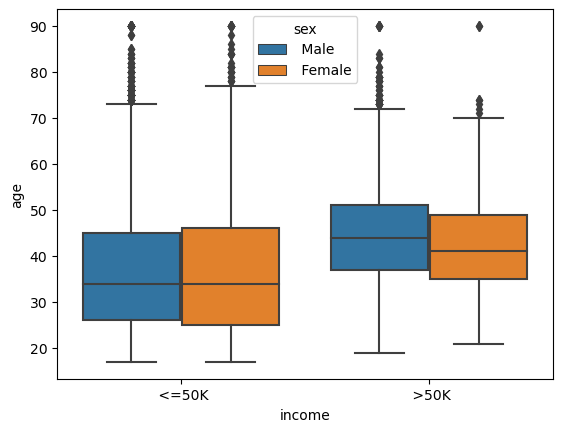

In [25]:
sns.boxplot(x='income',y='age',hue='sex',data=df)

In [26]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


<Axes: >

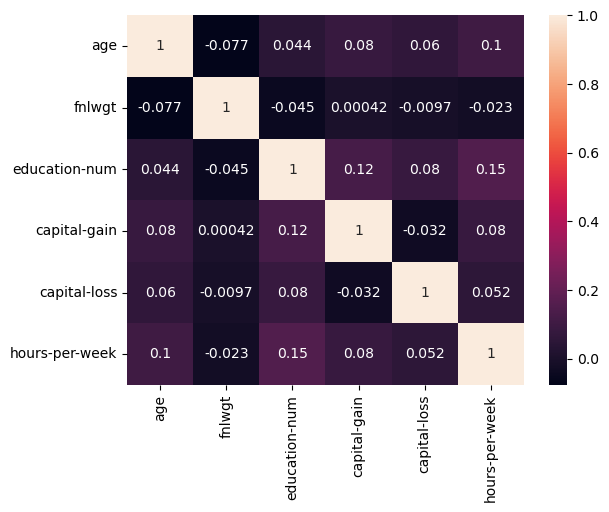

In [27]:
sns.heatmap(df.corr(),annot=True)

# Data Transformation

### Columns Data Types

In [28]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Certain column types will need to be changed for the machine learning models to use. Machine Learning models will not be able to process 

In [29]:
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

In [30]:
df # ------->   0 for <=50 & 1 for >=50

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [31]:
df=pd.get_dummies(df,drop_first=True)

In [32]:
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,

# 3. Data Preprocessing

The data needs to be normalised before using it to train models, so all the numeric features need to be on the same scale. For this we use min-max scaler.

In [33]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [34]:
scaled_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.043338,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.047277,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.137244,0.533333,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.150212,0.400000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.220703,0.800000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

# 4. ML Model Developing

#### Splitting the data 

In [35]:
x = scaled_df.drop('income', axis=1)
y = scaled_df['income']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1501)

In [36]:
y_train.value_counts()

0.0    15910
1.0     5203
Name: income, dtype: int64

The data is imbalanced

In [37]:
sm = SMOTE(random_state = 12) 
x_train_res, y_train_res=sm.fit_resample(x_train,y_train)
x_train_res=pd.DataFrame(x_train_res,columns=x_train.columns)
y_train_res=pd.DataFrame(y_train_res,columns=['income'])

Create a function to calculate the metrics of each model.

In [38]:
def metric(y_test, pred):
    
    precision_metric =precision_score(y_test, pred, average = "macro")
    recall_metric =recall_score(y_test, pred, average = "macro")
    accuracy_metric = accuracy_score(y_test, pred)
    f1_metric = f1_score(y_test, pred, average = "macro")
    print('Precision :',round(precision_metric, 2))
    print('Recall :',round(recall_metric, 2))
    print('Accuracy :',round(accuracy_metric, 4))
    print('F1 score:',round(f1_metric, 2))

### 1. Logistic Regression

In [39]:
log= LogisticRegression() 
log.fit(x_train_res, y_train_res)
y_pred_log = log.predict(x_test)

In [40]:
metric(y_test, y_pred_log)

Precision : 0.76
Recall : 0.82
Accuracy : 0.8027
F1 score: 0.77


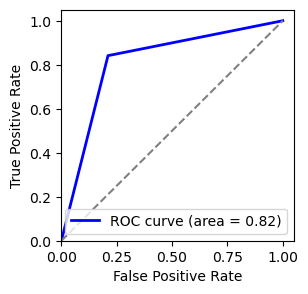

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred_log)

# Plot ROC curve
plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

#### 1(a).Logistic Regression(Lasso)

In [42]:
log_lasso = LogisticRegression(penalty='l1', solver='liblinear')
log_lasso.fit(x_train_res, y_train_res)
y_pred_log_lasso = log_lasso.predict(x_test)

In [43]:
metric(y_test, y_pred_log_lasso)

Precision : 0.76
Recall : 0.82
Accuracy : 0.8067
F1 score: 0.77


#### 1(b). Logistic Regression(Ridge)

In [44]:
log_ridge = LogisticRegression(penalty='l2') 
log_ridge.fit(x_train_res, y_train_res)
y_pred_log_ridge = log_ridge.predict(x_test)

In [45]:
metric(y_test, y_pred_log_ridge)

Precision : 0.76
Recall : 0.82
Accuracy : 0.8027
F1 score: 0.77


### 2. Naive Bayes

In [46]:
nb=BernoulliNB() 
nb.fit(x_train_res, y_train_res)
y_pred_nb = nb.predict(x_test)

In [47]:
metric(y_test, y_pred_nb)

Precision : 0.72
Recall : 0.79
Accuracy : 0.7593
F1 score: 0.73


### 3. Support Vector Classifier

In [48]:
#svc= SVC(kernel='linear') 
#svc.fit(x_train_res, y_train_res)
#y_pred_svc = svc.predict(x_test)

In [49]:
#metric(y_test, y_pred_svc)

### 4.  KNeighborsClassifier 

In [50]:
knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train_res, y_train_res)
y_pred_knc = knc.predict(x_test)

In [51]:
metric(y_test, y_pred_knc)

Precision : 0.72
Recall : 0.76
Accuracy : 0.7768
F1 score: 0.73


### 5. Decision tree

In [52]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train_res, y_train_res)

y_pred_dt = dt.predict(x_test)

In [53]:
metric(y_test, y_pred_dt)

Precision : 0.72
Recall : 0.79
Accuracy : 0.7508
F1 score: 0.72


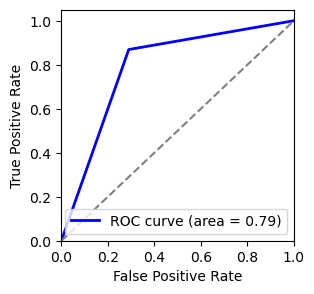

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)

# Calculate AUC (Area Under the ROC Curve)
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Plot ROC curve
plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### 6. Random Forest

In [55]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf.fit(x_train_res, y_train_res)
y_pred_rf = rf.predict(x_test)


In [56]:
metric(y_test, y_pred_rf)

Precision : 0.72
Recall : 0.79
Accuracy : 0.7502
F1 score: 0.72


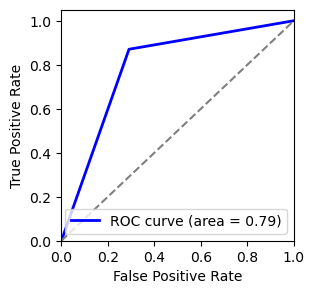

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

roc_auc = roc_auc_score(y_test, y_pred_rf)

# Plot ROC curve
plt.figure(figsize=(3,3))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### 7. XGBoosting

In [58]:
xg=xgb.XGBClassifier()
xg.fit(x_train_res, y_train_res)
y_pred_xg = xg.predict(x_test)

In [59]:
metric(y_test, y_pred_xg)

Precision : 0.8
Recall : 0.81
Accuracy : 0.8519
F1 score: 0.81


In [60]:
confusion_matrix(y_test, y_pred_xg)

array([[6042,  702],
       [ 638, 1667]], dtype=int64)

# Feature Selection

In [61]:
num_features_to_select = 10  # Number of features you want to select
selector = SelectKBest(score_func=chi2, k=num_features_to_select)
x_train_selected = selector.fit_transform(x_train_res, y_train_res)
x_test_selected = selector.transform(x_test)

### 1. LogisticRegression with Feature Selection

In [62]:
log1= LogisticRegression() 
log1.fit(x_train_selected, y_train_res)
y_pred_log1 = log1.predict(x_test_selected)

In [63]:
metric(y_test, y_pred_log1)

Precision : 0.71
Recall : 0.77
Accuracy : 0.7193
F1 score: 0.7


### 2. XGBoosting with Feature Selection

In [64]:
xg1=xgb.XGBClassifier()
xg1.fit(x_train_selected, y_train_res)
y_pred_xg1 = xg1.predict(x_test_selected)

In [65]:
metric(y_test, y_pred_xg1)

Precision : 0.71
Recall : 0.77
Accuracy : 0.7275
F1 score: 0.7


### 3. DecisionTree with Feature Selection and GridSearch

In [66]:
grid_space={'criterion':['gini','entropy'],
           'max_depth':range(3,8)}

In [67]:
dt = DecisionTreeClassifier()
model = GridSearchCV(dt,grid_space,cv=3,scoring='accuracy')
model.fit(x_train_selected, y_train_res)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 8)},
             scoring='accuracy')

In [68]:
model.best_params_

{'criterion': 'gini', 'max_depth': 7}

In [69]:
model.best_score_

0.779886977743093

In [70]:
dt_cv=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt_cv.fit(x_train_selected, y_train_res)
y_pred_dt_cv=dt_cv.predict(x_test_selected)
metric(y_test, y_pred_dt_cv)

Precision : 0.7
Recall : 0.76
Accuracy : 0.7122
F1 score: 0.69


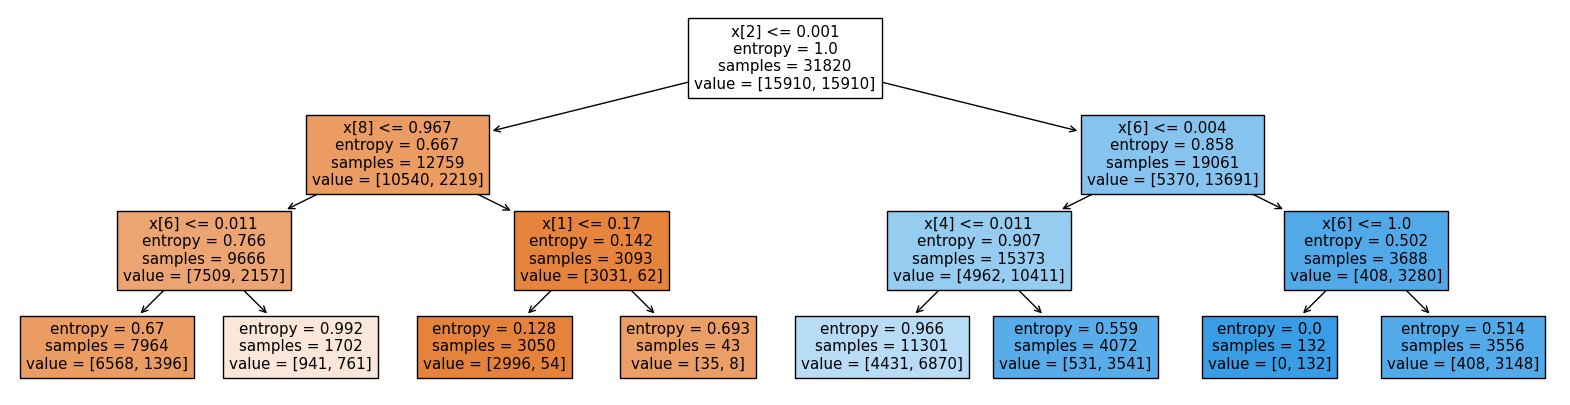

In [71]:
plt.figure(figsize=(20,5))
tree.plot_tree(dt_cv.fit(x_train_selected, y_train_res),filled=True)
plt.show()

### 4. RandomForest with Feature Selection and GridSearch

In [72]:
grid_space={'criterion':['gini','entropy'],
   'max_depth':range(3,7),
   'min_samples_split':range(0,3),
    'min_samples_leaf':range(2,5)}

In [73]:
rf=RandomForestClassifier()
model = GridSearchCV(rf,grid_space,cv=3,scoring='accuracy')
model.fit(x_train_selected, y_train_res)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 7),
                         'min_samples_leaf': range(2, 5),
                         'min_samples_split': range(0, 3)},
             scoring='accuracy')

In [74]:
model.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [75]:
model.best_score_

0.7817725902096267

# 5. Conclusion

In conclusion, after thoroughly analyzing the "Adult Income" dataset, it becomes evident that the XGBoost algorithm stands out as the most effective choice for income classification. 